In [35]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import graphviz
#from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Project path
ppath = sys.path[0]

In [73]:
df = pd.read_csv(os.path.join(ppath, 'data', 'uciml_pima-indians-diabetes-database', 'diabetes.csv'))

In [31]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [74]:
# Select all rows and all columns except the last one
X = df.iloc[:, :-1]
# Select all rows and only the last column
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Accuracy: 0.7792207792207793
Confusion matrix:
 [[75 21]
 [13 45]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        96
           1       0.68      0.78      0.73        58

    accuracy                           0.78       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.78      0.78       154



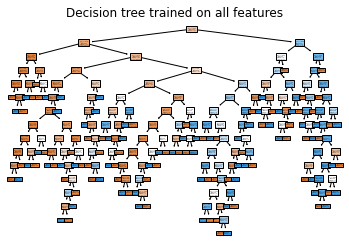

In [75]:
plt.figure()
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all features")
plt.show()

Accuracy: 0.7467532467532467
Confusion matrix:
 [[90  6]
 [33 25]]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.94      0.82        96
           1       0.81      0.43      0.56        58

    accuracy                           0.75       154
   macro avg       0.77      0.68      0.69       154
weighted avg       0.76      0.75      0.72       154



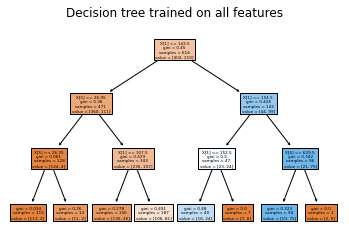

In [76]:
plt.figure()
clf = DecisionTreeClassifier(random_state=0,max_depth=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all features")
plt.show()

In [45]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(X.columns),  
                                class_names=['0', '1'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render("pima-depth-3") 

'pima-depth-3.pdf'

In [77]:
# Bin the data
df['Glucose.binned'] = pd.cut(df['Glucose'], bins=[-1, 145, 160, 200], labels=[0, 1, 2])
df['Glucose.binned'] = df['Glucose.binned'].astype('int64')

In [78]:
X = df[['Glucose.binned', 'Pregnancies', 'Insulin', 'BMI', 'Age', 'BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Accuracy: 0.7402597402597403
Confusion matrix:
 [[92  4]
 [36 22]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82        96
           1       0.85      0.38      0.52        58

    accuracy                           0.74       154
   macro avg       0.78      0.67      0.67       154
weighted avg       0.77      0.74      0.71       154



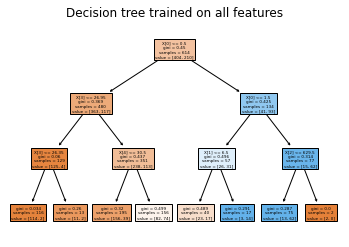

In [79]:
plt.figure()
clf = DecisionTreeClassifier(random_state=0,max_depth=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all features")
plt.show()

In [72]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(X.columns),  
                                class_names=['0', '1'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render("pima-binned-depth-3") 

'pima-binned-depth-3.pdf'

In [68]:
nan_rows = df[df['Glucose.binned'].isnull()]
nan_rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose.binned
75,1,0,48,20,0,24.7,0.140,22,0,NaN
182,1,0,74,20,23,27.7,0.299,21,0,NaN
342,1,0,68,35,0,32.0,0.389,22,0,NaN
349,5,0,80,32,0,41.0,0.346,37,1,NaN
502,6,0,68,41,0,39.0,0.727,41,1,NaN
